# Chapter 2. 신경망의 수학적 구성 요소

---

## Contents
- 2.1 신경망과의 첫 만남 
- 2.2 신경망을 위한 데이터 표현 
- 2.3 신경망의 톱니바퀴 : 텐서 연산 
- 2.4 신경망의 엔진 : 그레디언트 기반 최적화 
- 2.5 첫 번째 예제 다시 살펴보기 

## Terminology
- task : 해결 하려는 문제 (ex. 이미지 분류, CTR prediction, Next POI prediction) 
- class : 분류 문제의 범주(category) (ex. 개/고양이, True/False, 0~9 ...)
- sample : 데이터 포인트 
- label : 특정 샘플의 클래스, 정답, ground truth
- epoch :
- batch : 

## Requirements
- keras : 파이썬 기반의 신경망 오픈소스 라이브러리
  - tensorflow2 부터 케라스가 포함됨 
- numpy : 다차원 배열 라이브러리
- matplotlib : 시각화에 사용

---

## 2.1 신경망과의 첫 만남

- MNIST 숫자 분류기 모델 만들기!! 

- MNIST 
  - 흑백 손글씨 (0~9)
  - 28 x 28
  - train set : 6만개 
  - test set : 1만개 
  - 딥러닝계의 hello world 

### Load MNIST dataset

In [1]:
from tensorflow.keras.datasets import mnist

(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

In [2]:
train_images.shape, train_labels.shape, train_labels

((60000, 28, 28), (60000,), array([5, 0, 4, ..., 5, 6, 8], dtype=uint8))

In [3]:
test_images.shape, test_labels.shape, test_labels

((10000, 28, 28), (10000,), array([7, 2, 1, ..., 4, 5, 6], dtype=uint8))

### Neural Network Structure

In [4]:
from tensorflow.keras import models 
from tensorflow.keras import layers 

model = models.Sequential()
model.add(layers.Dense(512, activation='relu', input_shape=(28*28,)))
model.add(layers.Dense(10, activation='softmax'))

In [5]:
model.compile(optimizer='rmsprop',
             loss='categorical_crossentropy',
             metrics=['acc'])

### Preparing for training/testing data

In [6]:
train_images = train_images.reshape((60000, 28 * 28))
train_images = train_images.astype('float32') / 255

test_images = test_images.reshape((10000, 28 * 28))
test_images = test_images.astype('float32') / 255

### Preparing for Labels

In [7]:
from tensorflow.keras.utils import to_categorical

In [8]:
train_labels = to_categorical(train_labels)
test_labels = to_categorical(test_labels)

In [9]:
train_labels.shape, train_labels

((60000, 10),
 array([[0., 0., 0., ..., 0., 0., 0.],
        [1., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 1., 0.]], dtype=float32))

### Model Training

In [10]:
model.fit(train_images, train_labels, epochs=5, batch_size=128)

Epoch 1/5
469/469 [==============================] - 2s 3ms/step - loss: 0.4134 - acc: 0.8818
Epoch 2/5
469/469 [==============================] - 1s 3ms/step - loss: 0.1123 - acc: 0.9674
Epoch 3/5
469/469 [==============================] - 1s 3ms/step - loss: 0.0692 - acc: 0.9797
Epoch 4/5
469/469 [==============================] - 1s 3ms/step - loss: 0.0483 - acc: 0.9857
Epoch 5/5
469/469 [==============================] - 1s 3ms/step - loss: 0.0356 - acc: 0.9899


### Model Testing

In [11]:
preds = model.predict(test_images)
preds.shape

(10000, 10)

In [12]:
test_labels[0]

array([0., 0., 0., 0., 0., 0., 0., 1., 0., 0.], dtype=float32)

In [13]:
import tensorflow as tf

tf.argmax(preds[0])

<tf.Tensor: shape=(), dtype=int64, numpy=7>

In [14]:
test_loss, ntest_acc = model.evaluate(test_images, test_labels)

313/313 [==============================] - 0s 563us/step - loss: 0.0632 - acc: 0.9822


---

## 2.2 신경망을 위한 데이터 표현

- 텐서 
  - 임의의 차원 개수를 가지는 행렬의 일반화된 모습
  - 차원(dimension)을 축(axis) 라고도 함 

### 스칼라(0D 텐서)
- 하나의 숫자만 갖는 텐서
- 스칼라 또는 0D 텐서라고 함

In [15]:
import numpy as np

x = np.array(12)
x

array(12)

In [16]:
x.shape

()

- `ndim` : 축의 개수 리턴. rank 라고도 함

In [17]:
x.ndim

0

### 벡터(1D 텐서)
- 숫자의 배열을 갖는 텐서
- 벡터 또는 1D 텐서 

In [18]:
x = np.array([12, 3, 6, 14, 7])
x

array([12,  3,  6, 14,  7])

- x는 5차원 벡터 (하나의 축을 따라 5개의 차원을 가짐)
- x는 1D 텐서 

In [19]:
x.ndim

1

In [20]:
x.shape

(5,)

### 행렬(2D 텐서)
- 벡터의 배열을 갖는 텐서 
- 행렬 또는 2D 텐서
- 2개의 축, 보통 행(row), 열(column)
- 벡터 데이터 (samples, features)
  - ex. (나이, 성별, 키)로 구성된 10만명의 인구데이터. (100000, 3) 크기의 텐서에 저장

In [21]:
x = np.array([[5, 78, 2, 34, 0],
             [6, 79, 3, 35, 1],
             [7, 80, 4, 36, 2]])
x.ndim

2

In [22]:
x.shape

(3, 5)

### 3D 텐서와 고차원 텐서
- 3D 텐서 : 시계열 데이터 또는 sequence 데이터 (samples, timesteps, features)
- 4D 텐서 : 이미지 (samples, height, width, channels) or (samples, channels, height, width)
- 5D 텐서 : 동영상 (samples, frames, height, wdith, channels) or (samples, frames, channels, height, width)

In [23]:
x = np.random.randint(0, 10, size=(3, 3, 5))
x

array([[[1, 4, 7, 0, 0],
        [6, 9, 9, 7, 3],
        [8, 8, 1, 8, 2]],

       [[9, 1, 2, 4, 0],
        [1, 4, 6, 8, 4],
        [2, 0, 9, 1, 6]],

       [[5, 1, 8, 0, 6],
        [7, 1, 7, 5, 6],
        [5, 8, 1, 5, 9]]])

In [24]:
x.ndim

3

In [25]:
x.shape

(3, 3, 5)

### 텐서의 핵심 속성
- 축의 개수(rank)
- 크기(shape)
- 데이터타입(dtype)

In [26]:
from tensorflow.keras.datasets import mnist 

(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

In [27]:
train_images.ndim, train_images.shape, train_images.dtype

(3, (60000, 28, 28), dtype('uint8'))

### 실제 이미지 출력

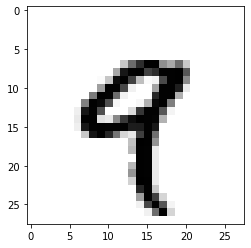

In [28]:
import matplotlib.pyplot as plt

digit = train_images[4]
plt.imshow(digit, cmap=plt.cm.binary)
plt.show()

### Slicing

In [29]:
train_images.shape

(60000, 28, 28)

In [30]:
my_slice = train_images[:10]
my_slice.shape

(10, 28, 28)

In [31]:
my_slice = train_images[5:10]
my_slice.shape

(5, 28, 28)

### Batch Data

- 일반적으로, 딥러닝에서 사용하는 모든 데이터 텐서의 첫 번째 축은 **샘플 축**
- 딥러닝 모델은 한 번에 전체 데이터셋을 처리하는 것이 아니라, 작은 배치(batch)로 나눔 

In [32]:
batch = train_images[:128]

In [33]:
batch = train_images[128:256]

In [34]:
n = 5 
batch = train_images[128 * n : 128 * (n+1)] # n번째 배치 

In [35]:
batch.shape

(128, 28, 28)

---

## 2.3 신경망의 톱니바퀴 : 텐서 연산

- 텐서 연산 : 텐서에 적용하는 연산 
  - ex) 텐서 덧셈, 텐서 곱셈, ... 

```python
tensorflow.keras.layers.Dense(512, activation='relu')
```
- 2D 텐서를 입력으로 받아, 입력 텐서의 새로운 표현인 또 다른 2D 텐서 반환

```python
output = relu(dot(W, input) + b)
```
- 위 식에서의 텐서연산
  - 입력 텐서와 W의 dot product 
  - dot product 결과인 2D텐서와 벡터 b 사이의 덧셈 
  - relu 연산 max(x, 0)

### Element-wise operation
- 텐서에 있는 각 원소에 독립적으로 적용 
- 이 말은 고도의 병렬구현이 가능한 연산
- relu 연산과 덧셈

In [36]:
def naive_relu(x):
    assert len(x.shape) == 2
    
    x = x.copy() # 입력 텐서 자체를 바꾸지 않도록 복사 
    for i in range(x.shape[0]):
        for j in range(x.shape[1]):
            x[i, j] = max(x[i, j], 0)
    return x

In [37]:
def naive_add(x, y):
    assert len(x.shape) == 2
    assert x.shape == y.shape 
    
    x = x.copy()
    for i in range(x.shape[0]):
        for j in range(x.shape[1]):
            x[i, j] += y[i, j]
    return x

- numpy 배열은 최적화된 넘파이 내장 연산들을 처리할 수 있음 
- 넘파이는 시스템에 설치된 BLAS(Basic Linear Algebra Subprogram) 구현에 복잡한 일들을 위임 
- BLAS는 고도로 병렬화되고 효율적인 저수준 텐서 조작 루틴 
- 전형적으로 Fortran, C 언어로 구현됨 
- 넘파이는 다음과 같은 원소별 연산을 엄청난 속도로 처리 

In [38]:
x = np.random.randint(1, 10, size=(50))
y = np.random.randint(1, 10, size=(50))

In [39]:
z = x + y
z = np.maximum(z, 0.)

### Broadcasting

- 위의 예제에서 2D 텐서와 벡터의 덧셈 
- 작은 텐서가 큰 텐서의 크기에 맞추어 브로드캐스팅 됨 
  - 큰 텐서의 ndim에 맞도록 작은 텐서에 축이 추가됨(브로드캐스팅 축)
  - 작은 텐서가 새 축을 따라서 큰 텐서의 크기에 맞도록 반복됨 

In [40]:
x = np.zeros(shape=(2, 10))
x, x.shape

(array([[0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.]]),
 (2, 10))

In [41]:
y = np.random.randint(1, 5, size=(10))
y.shape

(10,)

In [42]:
x + y

array([[3., 4., 3., 2., 1., 4., 2., 3., 2., 1.],
       [3., 4., 3., 2., 1., 4., 2., 3., 2., 1.]])

### Tensor dot product 

In [43]:
# 벡터 x와 벡터 y의 점곱 
def naive_vector_dot(x, y):
    assert len(x.shape) == 1
    assert len(y.shape) == 1
    assert x.shape[0] == y.shape[0]
    
    z = 0.
    for i in range(x.shape[0]):
        z += x[i] * y[i]
    return z

In [44]:
# 행렬 x와 벡터 y의 점곱 
def naive_matrix_vector_dot(x, y):
    assert len(x.shape) == 2
    assert len(y.shape) == 1
    assert x.shape[1] == y.shape[0]
    
    z = np.zeros(x.shape[0])
    for i in range(x.shape[0]):
        for j in range(x.shape[1]):
            z[i] += x[i, j] * y[j]
    return z

In [45]:
# 두 행렬 x, y간의 점곱 
def naive_matrix_dot(x, y):
    assert len(x.shape) == 2
    assert len(x.shape) == 2 
    assert x.shape[1] == y.shape[0]
    
    z = np.zeros((x.shape[0], y.shape[1]))
    for i in range(x.shape[0]):
        for j in range(y.shape[1]):
            row_x = x[i, :]
            column_y = y[:, j]
            z[i, j] = naive_vector_dot(row_x, column_y)
    return z

![행렬 점곱 다이어그램](fig1_dot_product.png)

---

# 2.4 신경망의 엔진 : 그레디언트 기반 최적화 

```python
output = relu(dot(W, input) + b)
```
- (Trainable) Parameter 
  - W : weight(가중치, 커널)
  - b : bias(편향)

- Training loop
  1. 훈련 샘플 x 와 이에 상응하는 타깃 y의 배치를 추출 
  2. x를 사용하여 네트워크를 실행하고 예측 y_pred를 구함 
  3. y_pred 와 y의 차이를 측정하여 이 배치에 대한 네트워크 손실을 계산 
  4. 배치에 대한 손실이 조금 감소되도록 네트워크의 모든 가중치를 업데이트

- 4번에서, 가중치를 얼마나 어떻게 업데이트 할까? 
  - brute force 관점에서?
    - 가중치 행렬 원소 중 모두 고정하고, 하나의 값만 변경해 봄 
      - step1) 0.3(w) -> 0.5(loss)
      - step2) 0.35(w) -> 0.6(loss)
      - step3) 0.25(w) -> 0.4(loss)
    - 보통 수천에서 수백만 개의 가중치가 있는데... 너무 비효율적!!!

- 신경망의 모든 연산이 **미분 가능** 하다는 장점을 사용하여 네트워크 가중치에 대한 손실의 **그레디언트**를 계산하자!


### 경사 하강법(Gradient Descent)

cf) [모두의 딥러닝2 경사하강법](https://youtu.be/D_ws0YyHAm8?list=PLQ28Nx3M4Jrguyuwg4xe9d9t2XE639e5C&t=407)

$H(x)=Wx$  
$Cost(W)=\frac{1}{m}\sum_{i=1}^m(Wx_i-y_i)^2$  


In [46]:
x = np.array([1, 2, 3])
y = np.array([1, 2, 3])

def cost(W, X, Y):
    c = 0
    for i in range(len(X)):
        c += (W * X[i] - Y[i]) ** 2
    return c / len(X)

W_values = np.linspace(-3, 5, 15)
cost_values = []
print('   W\t     cost')
for feed_W in W_values:
    curr_cost = cost(feed_W, x, y)
    cost_values.append(curr_cost)
    print(f'{feed_W:6.3f} | {curr_cost:10.5f}')

   W	     cost
-3.000 |   74.66667
-2.429 |   54.85714
-1.857 |   38.09524
-1.286 |   24.38095
-0.714 |   13.71429
-0.143 |    6.09524
 0.429 |    1.52381
 1.000 |    0.00000
 1.571 |    1.52381
 2.143 |    6.09524
 2.714 |   13.71429
 3.286 |   24.38095
 3.857 |   38.09524
 4.429 |   54.85714
 5.000 |   74.66667


Text(0, 0.5, 'Cost')

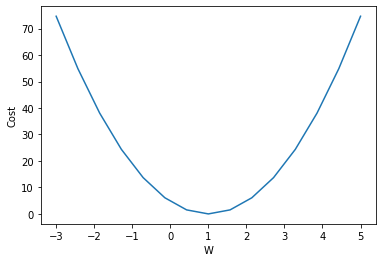

In [47]:
plt.plot(W_values, cost_values)
plt.xlabel('W')
plt.ylabel('Cost')

- cost 가 최저가 되는 점을 찾기 위해 w를 업데이트
- cost에 대한 함수를 미분하여 w를 업데이트 하자!

$W:=W-\alpha\frac{\partial}{\partial W}\frac{1}{2m}\sum_{i=1}^m(Wx_i-y_i)^2$  
$W:=W-\alpha\frac{1}{m}\sum_{i=1}^m(Wx_i-y_i)x_i$

- $\alpha$ : learning rate 
- 계산 편의를 위해 $2m$으로 나눔

In [48]:
tf.random.set_seed(0)

x = [1., 2., 3., 4.]
y = [1., 3., 5., 7.]

W = tf.Variable(tf.random.normal([1], -100., 100.))

print('epoch      cost           W')
n_epoch = 300
for epoch in range(n_epoch):
    hypothesis = W * x
    cost = tf.reduce_mean(tf.square(hypothesis - y))
    
    learning_rate = 0.01
    gradient = tf.reduce_mean((W * x - y) * x)
    W.assign(W - learning_rate * gradient)
    
    if epoch % 10 == 0:
        c = cost.numpy()
        w = W.numpy()[0]
        print(f'{epoch:5} | {c:10.4f} | {w:10.6f}')

epoch      cost           W
    0 | 18332.2188 |  47.398293
   10 |  3855.3564 |  22.638384
   20 |   810.9046 |  11.283927
   30 |   170.6631 |   6.076973
   40 |    36.0217 |   3.689155
   50 |     7.7069 |   2.594144
   60 |     1.7524 |   2.091991
   70 |     0.5001 |   1.861713
   80 |     0.2368 |   1.756112
   90 |     0.1814 |   1.707684
  100 |     0.1698 |   1.685477
  110 |     0.1673 |   1.675292
  120 |     0.1668 |   1.670622
  130 |     0.1667 |   1.668481
  140 |     0.1667 |   1.667498
  150 |     0.1667 |   1.667048
  160 |     0.1667 |   1.666842
  170 |     0.1667 |   1.666747
  180 |     0.1667 |   1.666703
  190 |     0.1667 |   1.666684
  200 |     0.1667 |   1.666674
  210 |     0.1667 |   1.666670
  220 |     0.1667 |   1.666668
  230 |     0.1667 |   1.666667
  240 |     0.1667 |   1.666667
  250 |     0.1667 |   1.666667
  260 |     0.1667 |   1.666667
  270 |     0.1667 |   1.666667
  280 |     0.1667 |   1.666667
  290 |     0.1667 |   1.666667


### 역전파 알고리즘 (back propagation)

- 가장 중요한 개념은 chaining rule
- chaining rule 
    - $f(g(x))'=f'(g(x))\cdot g'(x)$
    - $\frac{\partial f}{\partial x}= \frac{\partial f}{\partial g} \cdot \frac{\partial g}{\partial x}$ 

cf) [모두의딥러닝1 Back propagation](https://youtu.be/573EZkzfnZ0?list=PLlMkM4tgfjnLSOjrEJN31gZATbcj_MpUm)

![역전파](fig2_backpropagation.png)

---

## 2.5 첫 번째 예재 다시 보기

In [49]:
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

train_images = train_images.reshape((60000, 28 * 28))
train_images = train_images.astype('float32') / 255

test_images = test_images.reshape((10000, 28 * 28))
test_images = test_images.astype('float32') / 255

train_labels = to_categorical(train_labels)
test_labels = to_categorical(test_labels)

model = models.Sequential()
model.add(layers.Dense(512, activation='relu', input_shape=(28 * 28,)))
model.add(layers.Dense(10, activation='softmax'))
model.compile(optimizer='rmsprop',
             loss='categorical_crossentropy',
             metrics=['acc'])
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_2 (Dense)              (None, 512)               401920    
_________________________________________________________________
dense_3 (Dense)              (None, 10)                5130      
Total params: 407,050
Trainable params: 407,050
Non-trainable params: 0
_________________________________________________________________


In [50]:
model.fit(train_images, train_labels, epochs=5, batch_size=128)

Epoch 1/5
469/469 [==============================] - 2s 3ms/step - loss: 0.4331 - acc: 0.8743
Epoch 2/5
469/469 [==============================] - 1s 3ms/step - loss: 0.1065 - acc: 0.9678
Epoch 3/5
469/469 [==============================] - 1s 3ms/step - loss: 0.0721 - acc: 0.9770
Epoch 4/5
469/469 [==============================] - 1s 3ms/step - loss: 0.0502 - acc: 0.9848
Epoch 5/5
469/469 [==============================] - 1s 3ms/step - loss: 0.0339 - acc: 0.9899


---

그래서 케라스 창시자는 누군데?
[프랑소와 숄레](https://medium.com/dsnet/interview-with-the-creator-of-keras-ai-researcher-fran%C3%A7ois-chollet-823cf1099b7c)

![프랑소와 숄레](fig3_francois_chollet.png)